import pandas as pd
import numpy as np
import matplotlib.pyplot as lpt

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import seaborn as sns

In [6]:
#Renombrar el archivo de presentation data base a:Presentationdatabase.xlsx

In [7]:
%ls Presentationdatabase.xlsx


Presentationdatabase.xlsx


In [8]:
df=pd.read_excel('Presentationdatabase.xlsx',
                 engine='openpyxl',
                 sheet_name='Sheet1',
                )

In [9]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# 1. Write the name of the data set

  Whine Quality Data Set

# 2. Organisation that generated it

    University of Minho, Paulo Cortez

# 3. Link of the dataset

    https://archive.ics.uci.edu/ml/datasets/wine+quality

#  4. Description of the data set

This data set analyzes certain variants of the Portuguese "Vinho Verde" white wine. 
We have input and output variables, the objective of this data set is to model this wine
quality based on certain physicochemical characteristics. We have input and output variables.
Our input variables are the physicochemical characteristics of the wine:
"fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";
"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol". 
These variables are all quantitative and continuous.
Our output variable is "quality" it is a discrete variable that can vary from 1-10. 

#  Statistical analysis of the variables

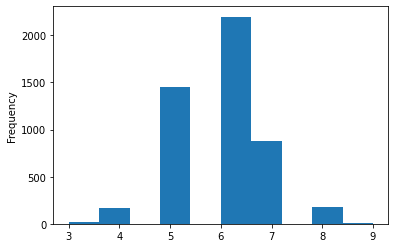

In [15]:
hist_plot=df['quality'].plot(kind='hist')

We can observe that the majority of the wines are qualified between 6-7.

In [17]:
df['quality'].std()

0.8856385749678312

The standard deviation of the variable quality is 0.8856385749678312

Now, I made the box plots for various variables so that we can analyze the dispersion
of its data and identify the outliers.

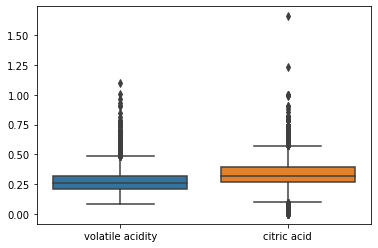

In [20]:
sns.boxplot(data=df.loc[:,[ 'volatile acidity', 'citric acid',
       ]])

We can observe that these two variables have a lot of outliers. 

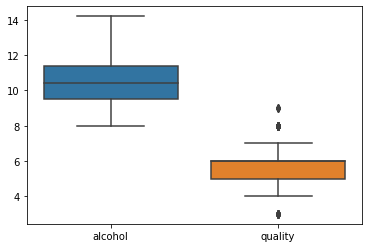

In [22]:
sns.boxplot(data=df.loc[:,['alcohol', 'quality'
                          ]])

These two variables have less disperse data, the variable “alcohol” has no outliers
and the variable “quality” has a few (those ratings of 3, 8 and 9). 

In [24]:
import pylab

In [25]:
import scipy.stats as stats

((array([-3.63037229, -3.39472968, -3.26483892, ...,  3.26483892,
          3.39472968,  3.63037229]),
  array([ 8.  ,  8.  ,  8.4 , ..., 14.  , 14.05, 14.2 ])),
 (1.2036828686323453, 10.5142670477746, 0.9775455507326097))

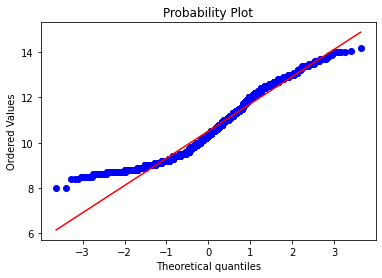

In [26]:
stats.probplot(df['alcohol'],dist="norm",plot=pylab)

((array([-3.63037229, -3.39472968, -3.26483892, ...,  3.26483892,
          3.39472968,  3.63037229]),
  array([0.98711, 0.98713, 0.98722, ..., 1.0103 , 1.0103 , 1.03898])),
 (0.0029227150705349613, 0.9940273764801959, 0.9766358789230607))

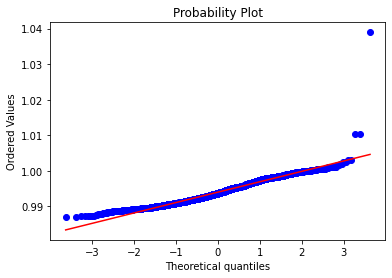

In [27]:
stats.probplot(df['density'],dist="norm",plot=pylab)

Then I did a normality test with the input variables and found out
that the variables: "alcohol" and "density" could be represented 
with the normal distribution. 

### Question 1: What is the Portuguese "Vinho Verde" white wine overall quality?

In [30]:
df['quality'].mean()

5.87790935075541

The mean  quality of the wine is 5.87790935075541
which tells us that the white wine is mid-low quality

### Question 2: Does the quality depends on the fixed acity level?

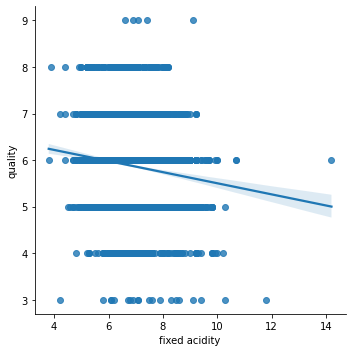

In [34]:
sns.lmplot(x='fixed acidity',
           y='quality',
           data=df
          )

This graph is a scatter plot of fixed acidity vs quality, 
as you can observe there is no linear correlation between these two variables.
I did the same with all the other input variables and all the graphs were similar,
therefore we can conclude that the quality does not depends on an isolated variable
but on a combination of them.

### Question 3:How can we obtain the highest quality?

In [37]:
df['quality'].max()

9

In [48]:
top= df.sort_values(['quality'],ascending=False, axis=0)

In [50]:
top.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
827,7.4,0.24,0.36,2.00,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
1605,7.1,0.26,0.49,2.20,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9
876,6.9,0.36,0.34,4.20,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
774,9.1,0.27,0.45,10.60,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,6.6,0.36,0.29,1.60,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
844,7.3,0.21,0.29,1.60,0.034,29.0,118.0,0.99170,3.30,0.50,11.0,8
2775,7.0,0.36,0.32,10.05,0.045,37.0,131.0,0.99352,3.09,0.33,11.7,8
860,8.1,0.27,0.35,1.70,0.030,38.0,103.0,0.99255,3.22,0.63,10.4,8
3188,7.0,0.17,0.36,6.40,0.055,42.0,123.0,0.99318,3.11,0.50,11.0,8
2774,7.0,0.36,0.32,10.05,0.045,37.0,131.0,0.99352,3.09,0.33,11.7,8


In the top 5 rows we can observe the combinations that gives us the highest
quality (9).